In [38]:
import pandas as pd
import os
import warnings
import numpy as np

warnings.filterwarnings('error')

In [39]:
# Directory containing sample CSVs
data_dir = 'data/sample_data/'
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Read and merge all CSVs, handling different schemas
dfs = []
for f in files:
    try:
        df = pd.read_csv(os.path.join(data_dir, f), low_memory=False)
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {f}: {e}")

# Check row counts for each file
row_counts = [len(df) for df in dfs]
print(f"Total files: {len(files)}")
print(f"Total rows (sum): {sum(row_counts)}")
print(f"Rows per file: {row_counts[:10]} ...")

# Merge using outer join to handle different schemas
merged_df = pd.concat(dfs, axis=0, join='outer', ignore_index=True)
print(f"Merged DataFrame shape: {merged_df.shape}")
merged_df.head()

Total files: 100
Total rows (sum): 992132
Rows per file: [2784, 10897, 2790, 8756, 13699, 7838, 2367, 8188, 16772, 190] ...
Merged DataFrame shape: (992132, 116)
Merged DataFrame shape: (992132, 116)


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,RH3,OD3,GA5,GD4,AU4,AW5,AX4,MW4,AK1,AM1
0,24266099999,2024-01-01T00:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24266099999,2024-01-01T03:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24266099999,2024-01-01T06:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24266099999,2024-01-01T09:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24266099999,2024-01-01T12:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Drop columns with more than 50% NaN values (pandas equivalent of NULL)
high_null_columns = []
total_rows = len(merged_df)
for col in merged_df.columns:
    print(f"Analyzing column: {col}")
    null_count = merged_df[col].isna().sum()
    if null_count / total_rows > 0.5:
        high_null_columns.append(col)

print(f"Columns with >50% missing values: {high_null_columns}")


Analyzing column: STATION
Analyzing column: DATE
Analyzing column: SOURCE
Analyzing column: LATITUDE
Analyzing column: LONGITUDE
Analyzing column: ELEVATION
Analyzing column: NAME
Analyzing column: REPORT_TYPE
Analyzing column: CALL_SIGN
Analyzing column: QUALITY_CONTROL
Analyzing column: WND
Analyzing column: CIG
Analyzing column: VIS
Analyzing column: TMP
Analyzing column: DEW
Analyzing column: DEW
Analyzing column: SLP
Analyzing column: AA1
Analyzing column: AA2
Analyzing column: AJ1
Analyzing column: AY1
Analyzing column: AY2
Analyzing column: AZ1
Analyzing column: AZ2
Analyzing column: GA1
Analyzing column: GA2
Analyzing column: GA3
Analyzing column: GE1
Analyzing column: GF1
Analyzing column: IA1
Analyzing column: KA1
Analyzing column: MA1
Analyzing column: MD1
Analyzing column: MW1
Analyzing column: SLP
Analyzing column: AA1
Analyzing column: AA2
Analyzing column: AJ1
Analyzing column: AY1
Analyzing column: AY2
Analyzing column: AZ1
Analyzing column: AZ2
Analyzing column: GA1
An

In [41]:
df_filtered = merged_df.drop(columns=high_null_columns)
df_filtered.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,GA1,GF1,MA1,REM
0,24266099999,2024-01-01T00:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,"999,9,C,0000,5","99999,9,9,N","020000,1,9,9","-0453,1","-0496,1","10201,1","99,9,+99999,9,02,1","08,99,1,00,1,99,9,99999,9,99,9,99,9","99999,9,09995,1",SYN05424266 42998 80000 11453 21496 39995 4020...
1,24266099999,2024-01-01T03:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,"240,1,N,0010,1","99999,9,9,N","050000,1,9,9","-0439,1","-0481,1","10186,1","99,9,+99999,9,02,1","08,99,1,00,1,99,9,99999,9,99,9,99,9","99999,9,09981,1",SYN05424266 42999 82401 11439 21481 39981 4018...
2,24266099999,2024-01-01T06:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,"220,1,N,0020,1","99999,9,9,N","020000,1,9,9","-0431,1","-0473,1","10180,1","99,9,+99999,9,02,1","08,99,1,00,1,99,9,99999,9,99,9,99,9","99999,9,09976,1",SYN05424266 42998 82202 11431 21473 39976 4018...
3,24266099999,2024-01-01T09:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,"250,1,N,0010,1","99999,9,9,N","020000,1,9,9","-0431,1","-0473,1","10184,1","99,9,+99999,9,02,1","08,99,1,00,1,99,9,99999,9,99,9,99,9","99999,9,09980,1",SYN07024266 12998 82501 11431 21473 39980 4018...
4,24266099999,2024-01-01T12:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,"240,1,N,0010,1","99999,9,9,N","020000,1,9,9","-0429,1","-0471,1","10186,1","99,9,+99999,9,02,1","08,99,1,00,1,99,9,99999,9,99,9,99,9","99999,9,09982,1",SYN05424266 42998 82401 11429 21471 39982 4018...


In [42]:
# Split columns with comma-separated values into separate columns (pandas equivalent)
columns_to_split = ["WND", "CIG", "VIS", "TMP", "DEW", "SLP", "GA1", "GF1", "MA1"]

for column in columns_to_split:
    if column in df_filtered.columns:
        # Find max number of splits in this column
        max_splits = df_filtered[column].dropna().apply(lambda x: len(str(x).split(","))).max()
        # Split and expand into new columns
        split_cols = df_filtered[column].str.split(",", expand=True, n=max_splits)
        for i in range(max_splits):
            df_filtered[f"{column}_{i}"] = split_cols[i]

df_filtered.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GF1_7,GF1_8,GF1_9,GF1_10,GF1_11,GF1_12,MA1_0,MA1_1,MA1_2,MA1_3
0,24266099999,2024-01-01T00:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,99999,9,99,9,99,9,99999,9,09995,1
1,24266099999,2024-01-01T03:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,99999,9,99,9,99,9,99999,9,09981,1
2,24266099999,2024-01-01T06:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,99999,9,99,9,99,9,99999,9,09976,1
3,24266099999,2024-01-01T09:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,99999,9,99,9,99,9,99999,9,09980,1
4,24266099999,2024-01-01T12:00:00,4,67.566667,133.4,138.0,"VERHOJANSK, RS",FM-12,99999,V020,...,99999,9,99,9,99,9,99999,9,09982,1


In [43]:
# Check columns that are 'additional data' for missing values (pandas translation)

def null_percentage(col, null_vals):
    return ((df_filtered[col].isin(null_vals) | df_filtered[col].isna()).sum() / total_rows) * 100

print(f"GA1_0 null percentage: {null_percentage('GA1_0', ['99']):.2f}%")
print(f"GA1_2 null percentage: {null_percentage('GA1_2', ['+99999']):.2f}%")
print(f"GA1_4 null percentage: {null_percentage('GA1_4', ['99']):.2f}%")
print(f"GF1_0 null percentage: {null_percentage('GF1_0', ['99']):.2f}%")
print(f"GF1_1 null percentage: {null_percentage('GF1_1', ['99']):.2f}%")
print(f"GF1_3 null percentage: {null_percentage('GF1_3', ['99']):.2f}%")
print(f"GF1_5 null percentage: {null_percentage('GF1_5', ['99']):.2f}%")
print(f"GF1_7 null percentage: {null_percentage('GF1_7', ['99999']):.2f}%")
print(f"GF1_9 null percentage: {null_percentage('GF1_9', ['99']):.2f}%")
print(f"GF1_11 null percentage: {null_percentage('GF1_11', ['99']):.2f}%")
print(f"MA1_0 null percentage: {null_percentage('MA1_0', ['99999']):.2f}%")
print(f"MA1_2 null percentage: {null_percentage('MA1_2', ['99999']):.2f}%")

GA1_0 null percentage: 48.53%
GA1_2 null percentage: 57.73%
GA1_4 null percentage: 90.35%
GF1_0 null percentage: 67.59%
GF1_1 null percentage: 100.00%
GF1_3 null percentage: 71.45%
GF1_5 null percentage: 100.00%
GF1_7 null percentage: 54.39%
GF1_9 null percentage: 100.00%
GF1_11 null percentage: 100.00%
MA1_0 null percentage: 39.38%
MA1_2 null percentage: 48.32%
GF1_5 null percentage: 100.00%
GF1_7 null percentage: 54.39%
GF1_9 null percentage: 100.00%
GF1_11 null percentage: 100.00%
MA1_0 null percentage: 39.38%
MA1_2 null percentage: 48.32%


In [44]:
columns_to_drop = ["GA1_0", "GA1_1", "GA1_2", "GA1_3","GA1_4", "GA1_5",
                   "GF1_0", "GF1_1", "GF1_2", "GF1_3", "GF1_4", "GF1_5", 
                   "GF1_6", "GF1_7", "GF1_8", "GF1_9", "GF1_10", "GF1_11", 
                   "GF1_12", "MA1_0", "MA1_1", "MA1_2", "MA1_3"]

# Drop original multi-value columns
columns_to_drop.extend(columns_to_split)

# Latitude and logitude already capture location, so drop station, name, call sign
columns_to_drop.extend(["STATION", "NAME", "CALL_SIGN"]) 

df_filtered = df_filtered.drop(columns=columns_to_drop)

In [45]:
# Group by and count for categorical columns (pandas translation)
print(df_filtered['SOURCE'].value_counts(dropna=False))
print(df_filtered['REPORT_TYPE'].value_counts(dropna=False))
print(df_filtered['QUALITY_CONTROL'].value_counts(dropna=False))

SOURCE
4    704143
7    164718
4     46503
7     32239
6     29153
6     14139
O      1237
Name: count, dtype: int64
REPORT_TYPE
FM-15    541008
FM-12    322338
FM-16     71619
FM-14     16730
SAO       15731
SHEF      13218
FM-13      6252
SOD        5093
SOM         122
SY-MT        21
Name: count, dtype: int64
QUALITY_CONTROL
V020    957319
V030     34813
Name: count, dtype: int64


In [46]:
df_filtered = df_filtered.drop(['SOURCE', 'REPORT_TYPE', 'QUALITY_CONTROL', 'REM'], axis=1)

In [47]:
df_filtered.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,WND_0,WND_1,WND_2,WND_3,WND_4,CIG_0,...,VIS_0,VIS_1,VIS_2,VIS_3,TMP_0,TMP_1,DEW_0,DEW_1,SLP_0,SLP_1
0,2024-01-01T00:00:00,67.566667,133.4,138.0,999,9,C,0000,5,99999,...,020000,1,9,9,-0453,1,-0496,1,10201,1
1,2024-01-01T03:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,050000,1,9,9,-0439,1,-0481,1,10186,1
2,2024-01-01T06:00:00,67.566667,133.4,138.0,220,1,N,0020,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10180,1
3,2024-01-01T09:00:00,67.566667,133.4,138.0,250,1,N,0010,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10184,1
4,2024-01-01T12:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,020000,1,9,9,-0429,1,-0471,1,10186,1


In [48]:
# Filter rows based on TMP_0 and TMP_1
df_cleaned = df_filtered[
    (df_filtered['TMP_0'].astype(float) >= -932) &
    (df_filtered['TMP_0'].astype(float) <= 618) &
    (~df_filtered['TMP_1'].isin(['2', '3', '6', '7']))
]

In [49]:
# Count rows with specified column conditions (pandas translation)
rows_with_3_or_7 = df_cleaned[
    ((df_cleaned['WND_0'].astype(float) > 360) & (df_cleaned['WND_0'].astype(float) != 999)) |
    (df_cleaned['WND_1'] == '3') | (df_cleaned['WND_1'] == '7') | (df_cleaned['WND_0'].astype(float) < 1) |
    (df_cleaned['WND_3'].astype(float) < 0) | ((df_cleaned['WND_3'].astype(float) > 900) & (df_cleaned['WND_3'].astype(float) != 9999)) |
    (df_cleaned['WND_4'] == '3') | (df_cleaned['WND_4'] == '7') |
    (df_cleaned['CIG_0'].astype(float) < 0) | ((df_cleaned['CIG_0'].astype(float) > 22000) & (df_cleaned['CIG_0'].astype(float) != 99999)) |
    (df_cleaned['CIG_1'] == '3') | (df_cleaned['CIG_1'] == '7') |
    (~df_cleaned['CIG_3'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_0'].astype(float) < 0) | ((df_cleaned['VIS_0'].astype(float) > 160000) & (df_cleaned['VIS_0'].astype(float) != 999999)) |
    (df_cleaned['VIS_1'] == '3') | (df_cleaned['VIS_1'] == '7') |
    (~df_cleaned['VIS_2'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_3'] == '3') | (df_cleaned['VIS_3'] == '7') |
    (df_cleaned['DEW_0'].astype(float) < -982) | ((df_cleaned['DEW_0'].astype(float) > 368) & (df_cleaned['DEW_0'].astype(float) != 9999)) |
    (df_cleaned['DEW_1'] == '3') | (df_cleaned['DEW_1'] == '7') |
    (df_cleaned['SLP_0'].astype(float) < 8600) | ((df_cleaned['SLP_0'].astype(float) > 10900) & (df_cleaned['SLP_0'].astype(float) != 99999)) |
    (df_cleaned['SLP_1'] == '3') | (df_cleaned['SLP_1'] == '7')
]

print(f"Number of rows with specified columns with erroneous data: {len(rows_with_3_or_7)}")

Number of rows with specified columns with erroneous data: 2570


In [50]:
# Drop rows with specified erroneous data conditions
mask = (
    ((df_cleaned['WND_0'].astype(float) > 360) & (df_cleaned['WND_0'].astype(float) != 999)) |
    (df_cleaned['WND_1'] == '3') | (df_cleaned['WND_1'] == '7') | (df_cleaned['WND_0'].astype(float) < 1) |
    (df_cleaned['WND_3'].astype(float) < 0) | ((df_cleaned['WND_3'].astype(float) > 900) & (df_cleaned['WND_3'].astype(float) != 9999)) |
    (df_cleaned['WND_4'] == '3') | (df_cleaned['WND_4'] == '7') |
    (df_cleaned['CIG_0'].astype(float) < 0) | ((df_cleaned['CIG_0'].astype(float) > 22000) & (df_cleaned['CIG_0'].astype(float) != 99999)) |
    (df_cleaned['CIG_1'] == '3') | (df_cleaned['CIG_1'] == '7') |
    (~df_cleaned['CIG_3'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_0'].astype(float) < 0) | ((df_cleaned['VIS_0'].astype(float) > 160000) & (df_cleaned['VIS_0'].astype(float) != 999999)) |
    (df_cleaned['VIS_1'] == '3') | (df_cleaned['VIS_1'] == '7') |
    (~df_cleaned['VIS_2'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_3'] == '3') | (df_cleaned['VIS_3'] == '7') |
    (df_cleaned['DEW_0'].astype(float) < -982) | ((df_cleaned['DEW_0'].astype(float) > 368) & (df_cleaned['DEW_0'].astype(float) != 9999)) |
    (df_cleaned['DEW_1'] == '3') | (df_cleaned['DEW_1'] == '7') |
    (df_cleaned['SLP_0'].astype(float) < 8600) | ((df_cleaned['SLP_0'].astype(float) > 10900) & (df_cleaned['SLP_0'].astype(float) != 99999)) |
    (df_cleaned['SLP_1'] == '3') | (df_cleaned['SLP_1'] == '7')
)

df_cleaned = df_cleaned[~mask]
df_cleaned.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,WND_0,WND_1,WND_2,WND_3,WND_4,CIG_0,...,VIS_0,VIS_1,VIS_2,VIS_3,TMP_0,TMP_1,DEW_0,DEW_1,SLP_0,SLP_1
0,2024-01-01T00:00:00,67.566667,133.4,138.0,999,9,C,0000,5,99999,...,020000,1,9,9,-0453,1,-0496,1,10201,1
1,2024-01-01T03:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,050000,1,9,9,-0439,1,-0481,1,10186,1
2,2024-01-01T06:00:00,67.566667,133.4,138.0,220,1,N,0020,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10180,1
3,2024-01-01T09:00:00,67.566667,133.4,138.0,250,1,N,0010,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10184,1
4,2024-01-01T12:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,020000,1,9,9,-0429,1,-0471,1,10186,1


In [51]:
# Drop rows with specified erroneous data conditions
mask = (
    ((df_cleaned['WND_0'].astype(float) > 360) & (df_cleaned['WND_0'].astype(float) != 999)) |
    (df_cleaned['WND_1'] == '3') | (df_cleaned['WND_1'] == '7') | (df_cleaned['WND_0'].astype(float) < 1) |
    (df_cleaned['WND_3'].astype(float) < 0) | ((df_cleaned['WND_3'].astype(float) > 900) & (df_cleaned['WND_3'].astype(float) != 9999)) |
    (df_cleaned['WND_4'] == '3') | (df_cleaned['WND_4'] == '7') |
    (df_cleaned['CIG_0'].astype(float) < 0) | ((df_cleaned['CIG_0'].astype(float) > 22000) & (df_cleaned['CIG_0'].astype(float) != 99999)) |
    (df_cleaned['CIG_1'] == '3') | (df_cleaned['CIG_1'] == '7') |
    (~df_cleaned['CIG_3'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_0'].astype(float) < 0) | ((df_cleaned['VIS_0'].astype(float) > 160000) & (df_cleaned['VIS_0'].astype(float) != 999999)) |
    (df_cleaned['VIS_1'] == '3') | (df_cleaned['VIS_1'] == '7') |
    (~df_cleaned['VIS_2'].isin(['N', 'Y', '9'])) |
    (df_cleaned['VIS_3'] == '3') | (df_cleaned['VIS_3'] == '7') |
    (df_cleaned['DEW_0'].astype(float) < -982) | ((df_cleaned['DEW_0'].astype(float) > 368) & (df_cleaned['DEW_0'].astype(float) != 9999)) |
    (df_cleaned['DEW_1'] == '3') | (df_cleaned['DEW_1'] == '7') |
    (df_cleaned['SLP_0'].astype(float) < 8600) | ((df_cleaned['SLP_0'].astype(float) > 10900) & (df_cleaned['SLP_0'].astype(float) != 99999)) |
    (df_cleaned['SLP_1'] == '3') | (df_cleaned['SLP_1'] == '7')
)

df_cleaned = df_cleaned[~mask]
df_cleaned.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,WND_0,WND_1,WND_2,WND_3,WND_4,CIG_0,...,VIS_0,VIS_1,VIS_2,VIS_3,TMP_0,TMP_1,DEW_0,DEW_1,SLP_0,SLP_1
0,2024-01-01T00:00:00,67.566667,133.4,138.0,999,9,C,0000,5,99999,...,020000,1,9,9,-0453,1,-0496,1,10201,1
1,2024-01-01T03:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,050000,1,9,9,-0439,1,-0481,1,10186,1
2,2024-01-01T06:00:00,67.566667,133.4,138.0,220,1,N,0020,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10180,1
3,2024-01-01T09:00:00,67.566667,133.4,138.0,250,1,N,0010,1,99999,...,020000,1,9,9,-0431,1,-0473,1,10184,1
4,2024-01-01T12:00:00,67.566667,133.4,138.0,240,1,N,0010,1,99999,...,020000,1,9,9,-0429,1,-0471,1,10186,1


In [76]:
print(df_cleaned.shape)

(927610, 23)


In [52]:
# Train/test split and feature/target selection (pandas translation)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)
train_features = train_df.drop(["TMP_0", "TMP_1", "CIG_2", "WND_1", "WND_4", "CIG_1",
                                "VIS_1", "VIS_3", "DEW_1", "SLP_1"], axis=1)
train_target = train_df[["TMP_0", "TMP_1"]]
test_features = test_df.drop(["TMP_0", "TMP_1", "CIG_2", "WND_1", "WND_4", "CIG_1",
                                "VIS_1", "VIS_3", "DEW_1", "SLP_1"], axis=1)
test_target = test_df[["TMP_0", "TMP_1"]]

In [53]:
# Extract hour and day from DATE column (pandas translation)
if 'DATE' in train_features.columns:
    train_features['HOUR'] = pd.to_datetime(train_features['DATE'], errors='coerce').dt.hour
    train_features['MONTH'] = pd.to_datetime(train_features['DATE'], errors='coerce').dt.month
    train_features = train_features.drop('DATE', axis=1)


In [54]:
train_features.head()

,LATITUDE,LONGITUDE,ELEVATION,WND_0,WND_2,WND_3,CIG_0,CIG_3,VIS_0,VIS_2,DEW_0,SLP_0,HOUR,MONTH
53397,-21.45000,115.016667,6.0,020,N,0021,99999,N,999999,9,+0093,99999,13,7
969960,41.23300,-96.600000,373.1,999,C,0000,22000,N,016093,N,-0026,99999,6,2
915185,5.95000,-57.030000,2.0,999,C,0000,22000,N,020000,9,+0239,10141,9,8
772811,38.58600,-77.711000,103.0,999,C,0000,03353,N,016093,N,-0045,99999,14,4
929149,31.85742,-86.010250,118.6,080,N,0015,22000,N,016093,N,+0200,99999,22,9


In [55]:
total_rows = len(train_features)

In [56]:
# Latitude: '+99999' as missing
lat_missing_count = (train_features['LATITUDE'] == '+99999').sum()
lat_missing_pct = lat_missing_count / total_rows * 100

# Longitude: '+999999' as missing
lon_missing_count = train_features['LONGITUDE'].isna().sum() + (train_features['LONGITUDE'] == '+999999').sum()
lon_missing_pct = lon_missing_count / total_rows * 100

# Elevation: '+9999' as missing
elev_missing_count = train_features['ELEVATION'].isna().sum() + (train_features['ELEVATION'] == '+9999').sum()
elev_missing_pct = elev_missing_count / total_rows * 100

# WND_0: '999' as missing, but only if WND_2 != 'V'
wnd_0_missing_mask = (train_features['WND_0'] == '999') & (train_features.get('WND_2', pd.Series(['V']*total_rows)) != 'V')
wnd_0_missing_count = train_features['WND_0'].isna().sum() + wnd_0_missing_mask.sum()
wnd_0_missing_pct = wnd_0_missing_count / total_rows * 100

# WND_3: '9999' as missing
wnd_3_missing_count = train_features['WND_3'].isna().sum() + (train_features['WND_3'] == '9999').sum()
wnd_3_missing_pct = wnd_3_missing_count / total_rows * 100

# CIG_0: '99999' as missing
cig_0_missing_count = train_features['CIG_0'].isna().sum() + (train_features['CIG_0'] == '99999').sum()
cig_0_missing_pct = cig_0_missing_count / total_rows * 100

# VIS_0: '999999' as missing
vis_0_missing_count = train_features['VIS_0'].isna().sum() + (train_features['VIS_0'] == '999999').sum()
vis_0_missing_pct = vis_0_missing_count / total_rows * 100

# DEW_0: '+9999' as missing
dew_0_missing_count = train_features['DEW_0'].isna().sum() + (train_features['DEW_0'] == '+9999').sum()
dew_0_missing_pct = dew_0_missing_count / total_rows * 100

# SLP_0: '99999' as missing
slp_0_missing_count = (train_features['SLP_0'] == '99999').sum()
slp_0_missing_pct = slp_0_missing_count / total_rows * 100

print(f"Latitude = Missing percent: {lat_missing_pct:.2f}%")
print(f"Longitude = Missing percent: {lon_missing_pct:.2f}%")
print(f"Elevation = Missing percent: {elev_missing_pct:.2f}%")
print(f"WND_0 = Missing percent: {wnd_0_missing_pct:.2f}%")
print(f"WND_3 = Missing percent: {wnd_3_missing_pct:.2f}%")
print(f"CIG_0 = Missing percent: {cig_0_missing_pct:.2f}%")
print(f"VIS_0 = Missing percent: {vis_0_missing_pct:.2f}%")
print(f"DEW_0 = Missing percent: {dew_0_missing_pct:.2f}%")
print(f"SLP_0 = Missing percent: {slp_0_missing_pct:.2f}%")


Latitude = Missing percent: 0.00%
Longitude = Missing percent: 0.00%
Elevation = Missing percent: 0.00%
WND_0 = Missing percent: 16.41%
WND_3 = Missing percent: 3.21%
CIG_0 = Missing percent: 37.57%
VIS_0 = Missing percent: 18.74%
DEW_0 = Missing percent: 1.53%
SLP_0 = Missing percent: 58.55%


In [57]:
# Display datatypes of each column in train_features
print(train_features.dtypes)

LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
WND_0         object
WND_2         object
WND_3         object
CIG_0         object
CIG_3         object
VIS_0         object
VIS_2         object
DEW_0         object
SLP_0         object
HOUR           int32
MONTH          int32
dtype: object


In [58]:
# Encode CIG_3 and VIS_2 as two columns each, N is default (reference)
# For CIG_3: Y=1 if 'Y', 9=1 if '9', N=0 for both
train_features['CIG_3_Y'] = (train_features['CIG_3'] == 'Y').astype(int)
train_features['CIG_3_9'] = (train_features['CIG_3'] == '9').astype(int)
# For VIS_2: V=1 if 'V', 9=1 if '9', N=0 for both
train_features['VIS_2_V'] = (train_features['VIS_2'] == 'V').astype(int)
train_features['VIS_2_9'] = (train_features['VIS_2'] == '9').astype(int)
# Remove old columns
train_features = train_features.drop(['CIG_3', 'VIS_2'], axis=1)

In [59]:
train_features.head()

,LATITUDE,LONGITUDE,ELEVATION,WND_0,WND_2,WND_3,CIG_0,VIS_0,DEW_0,SLP_0,HOUR,MONTH,CIG_3_Y,CIG_3_9,VIS_2_V,VIS_2_9
53397,-21.45000,115.016667,6.0,020,N,0021,99999,999999,+0093,99999,13,7,0,0,0,1
969960,41.23300,-96.600000,373.1,999,C,0000,22000,016093,-0026,99999,6,2,0,0,0,0
915185,5.95000,-57.030000,2.0,999,C,0000,22000,020000,+0239,10141,9,8,0,0,0,1
772811,38.58600,-77.711000,103.0,999,C,0000,03353,016093,-0045,99999,14,4,0,0,0,0
929149,31.85742,-86.010250,118.6,080,N,0015,22000,016093,+0200,99999,22,9,0,0,0,0


In [60]:
train_features = train_features.drop('WND_2', axis=1)

In [61]:
# Transform WND_0: sin and cos, 999 as undetermined
wnd_0 = train_features['WND_0'].astype(float)
undetermined_mask = wnd_0 == 999

# Calculate radians for valid values
wnd_0_rad = np.deg2rad(wnd_0.where(~undetermined_mask, 0))
train_features['WND_0_sin'] = np.where(undetermined_mask, 0, np.sin(wnd_0_rad))
train_features['WND_0_cos'] = np.where(undetermined_mask, 0, np.cos(wnd_0_rad))
train_features['WND_0_undetermined'] = undetermined_mask.astype(int)

train_features = train_features.drop('WND_0', axis=1)

In [62]:
train_features.head()

,LATITUDE,LONGITUDE,ELEVATION,WND_3,CIG_0,VIS_0,DEW_0,SLP_0,HOUR,MONTH,CIG_3_Y,CIG_3_9,VIS_2_V,VIS_2_9,WND_0_sin,WND_0_cos,WND_0_undetermined
53397,-21.45000,115.016667,6.0,0021,99999,999999,+0093,99999,13,7,0,0,0,1,0.342020,0.939693,0
969960,41.23300,-96.600000,373.1,0000,22000,016093,-0026,99999,6,2,0,0,0,0,0.000000,0.000000,1
915185,5.95000,-57.030000,2.0,0000,22000,020000,+0239,10141,9,8,0,0,0,1,0.000000,0.000000,1
772811,38.58600,-77.711000,103.0,0000,03353,016093,-0045,99999,14,4,0,0,0,0,0.000000,0.000000,1
929149,31.85742,-86.010250,118.6,0015,22000,016093,+0200,99999,22,9,0,0,0,0,0.984808,0.173648,0


In [63]:
# Impute WND_3 only for 9999, DEW_0 only for +9999, using group mean by (LONGITUDE, LATITUDE, ELEVATION, MONTH)
# Ensure MONTH column exists
if 'MONTH' not in train_features.columns:
    if 'DATE' in train_features.columns:
        train_features['MONTH'] = pd.to_datetime(train_features['DATE'], errors='coerce').dt.month
    else:
        raise ValueError('No MONTH or DATE column available for imputation.')

# Convert WND_3 and DEW_0 to float for efficient computation
train_features['WND_3'] = train_features['WND_3'].replace(9999, np.nan).astype(float)
train_features['DEW_0'] = train_features['DEW_0'].replace('+9999', np.nan).astype(float)

# Impute WND_3 only for previously 9999
wnd3_group_mean = train_features.groupby(['LONGITUDE', 'LATITUDE', 'ELEVATION', 'MONTH'])['WND_3'].transform(lambda x: x.mean(skipna=True))
wnd3_mask = train_features['WND_3'].isna()
train_features.loc[wnd3_mask, 'WND_3'] = wnd3_group_mean[wnd3_mask]

# Impute DEW_0 only for previously +9999
dew0_group_mean = train_features.groupby(['LONGITUDE', 'LATITUDE', 'ELEVATION', 'MONTH'])['DEW_0'].transform(lambda x: x.mean(skipna=True))
dew0_mask = train_features['DEW_0'].isna()
train_features.loc[dew0_mask, 'DEW_0'] = dew0_group_mean[dew0_mask]

In [64]:
# Impute remaining NaNs in DEW_0 with global mean (fast imputation)
global_mean_dew0 = train_features['DEW_0'].mean(skipna=True)
train_features['DEW_0'] = train_features['DEW_0'].fillna(global_mean_dew0)
remaining_nans = train_features['DEW_0'].isna().sum()
print(f"Remaining NaNs in DEW_0 after global mean imputation: {remaining_nans}")

Remaining NaNs in DEW_0 after global mean imputation: 0


In [65]:
train_features = train_features.drop(['CIG_0', 'VIS_0', 'SLP_0'], axis=1, errors='ignore')

In [66]:
# Cyclical transformation for HOUR and MONTH
if 'HOUR' in train_features.columns:
    train_features['HOUR_sin'] = np.sin(2 * np.pi * train_features['HOUR'] / 24)
    train_features['HOUR_cos'] = np.cos(2 * np.pi * train_features['HOUR'] / 24)
if 'MONTH' in train_features.columns:
    train_features['MONTH_sin'] = np.sin(2 * np.pi * train_features['MONTH'] / 12)
    train_features['MONTH_cos'] = np.cos(2 * np.pi * train_features['MONTH'] / 12)

train_features = train_features.drop(['HOUR', 'MONTH'], axis=1, errors='ignore')

In [67]:
# Standardize latitude, longitude, elevation, WND_3, DEW_0 (replace columns)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_standardize = ['LATITUDE', 'LONGITUDE', 'ELEVATION', 'WND_3', 'DEW_0']
for col in cols_to_standardize:
    if col in train_features.columns:
        train_features[col] = scaler.fit_transform(train_features[[col]])

In [68]:
train_features.head()

,LATITUDE,LONGITUDE,ELEVATION,WND_3,DEW_0,CIG_3_Y,CIG_3_9,VIS_2_V,VIS_2_9,WND_0_sin,WND_0_cos,WND_0_undetermined,HOUR_sin,HOUR_cos,MONTH_sin,MONTH_cos
53397,-1.671835,1.578513,-0.668616,-0.188610,0.214449,0,0,0,1,0.342020,0.939693,0,-0.258819,-9.659258e-01,-0.500000,-8.660254e-01
969960,0.325552,-0.900363,0.093669,-0.200566,-0.899747,0,0,0,0,0.000000,0.000000,1,1.000000,6.123234e-17,0.866025,5.000000e-01
915185,-0.798737,-0.436840,-0.676922,-0.200566,1.581445,0,0,0,1,0.000000,0.000000,1,0.707107,-7.071068e-01,-0.866025,-5.000000e-01
772811,0.241205,-0.679097,-0.467195,-0.200566,-1.077643,0,0,0,0,0.000000,0.000000,1,-0.500000,-8.660254e-01,0.866025,-5.000000e-01
929149,0.026800,-0.776314,-0.434802,-0.192026,1.216288,0,0,0,0,0.984808,0.173648,0,-0.500000,8.660254e-01,-1.000000,-1.836970e-16


In [69]:
# Convert train_target columns to float (no standardization)
train_target = train_target.copy()
for col in train_target.columns:
    train_target[col] = pd.to_numeric(train_target[col], errors='coerce').astype(float)
train_target = train_target.drop('TMP_1', axis=1, errors='ignore')

In [70]:
train_target.head()

,TMP_0
53397,210.0
969960,-11.0
915185,248.0
772811,93.0
929149,250.0


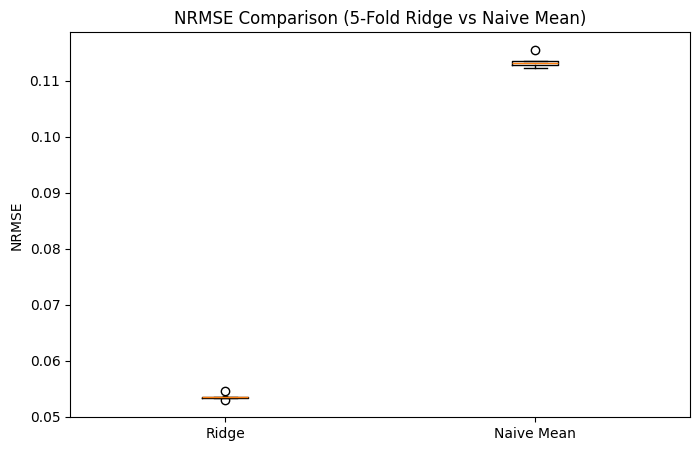

In [71]:
# Ridge regression and naive mean estimator with 5-fold cross-validation, NRMSE boxplots
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
nrmse_ridge = []
nrmse_naive = []

X = train_features.values
y = train_target.values

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # Ridge regression
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred_ridge = model.predict(X_val)
    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
    y_range = np.max(y_val) - np.min(y_val)
    nrmse_ridge.append(rmse_ridge / y_range if y_range != 0 else np.nan)
    # Naive mean estimator
    y_mean = np.mean(y_train, axis=0)
    y_pred_naive = np.tile(y_mean, (y_val.shape[0], 1))
    rmse_naive = np.sqrt(mean_squared_error(y_val, y_pred_naive))
    nrmse_naive.append(rmse_naive / y_range if y_range != 0 else np.nan)

# Boxplot comparison
plt.figure(figsize=(8, 5))
plt.boxplot([nrmse_ridge, nrmse_naive], tick_labels=['Ridge', 'Naive Mean'])
plt.title('NRMSE Comparison (5-Fold Ridge vs Naive Mean)')
plt.ylabel('NRMSE')
plt.show()

In [72]:
# Train Ridge regression on full training set and print metrics
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

X_full = train_features.values
y_full = train_target.values

model_full = Ridge()
model_full.fit(X_full, y_full)
y_pred_full = model_full.predict(X_full)

# Metrics
r2 = r2_score(y_full, y_pred_full)
rmse = np.sqrt(mean_squared_error(y_full, y_pred_full))
y_range = np.max(y_full) - np.min(y_full)
nrmse = rmse / y_range if y_range != 0 else np.nan
mae = mean_absolute_error(y_full, y_pred_full)
mape = mean_absolute_percentage_error(y_full, y_pred_full)

print(f"R2 score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"NRMSE: {nrmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R2 score: 0.7773
RMSE: 56.1221
NRMSE: 0.0530
MAE: 40.6849
MAPE: 1764851280143798.2500


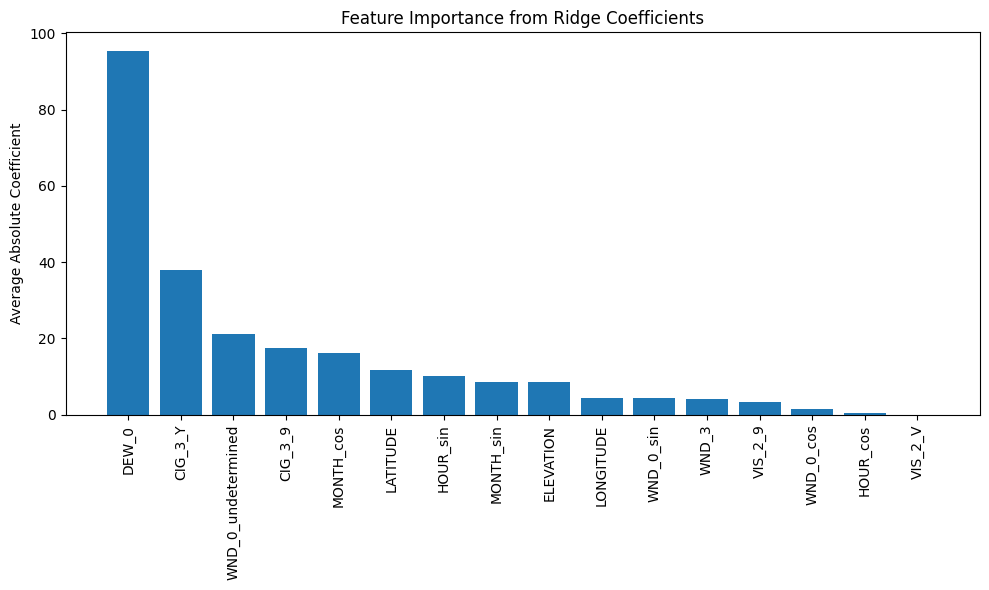

In [73]:
# Plot feature importance from Ridge model coefficients
import matplotlib.pyplot as plt
import numpy as np

# Use the model trained on the full training set (model_full)
feature_names = train_features.columns
if hasattr(model_full, 'coef_'):
    # If multi-output, average absolute coefficients across targets
    if model_full.coef_.ndim == 2:
        importance = np.mean(np.abs(model_full.coef_), axis=0)
    else:
        importance = np.abs(model_full.coef_)
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_names)), importance[sorted_idx])
    plt.xticks(range(len(feature_names)), feature_names[sorted_idx], rotation=90)
    plt.title('Feature Importance from Ridge Coefficients')
    plt.ylabel('Average Absolute Coefficient')
    plt.tight_layout()
    plt.show()
else:
    print('Ridge model does not have coef_ attribute.')

In [74]:
# Fit Gradient Boosting regression model and compare to Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

X_full = train_features.values
y_full = train_target.values

# If multi-output, fit one regressor per target
if y_full.ndim == 2 and y_full.shape[1] > 1:
    gb_models = []
    y_pred_gb = np.zeros_like(y_full)
    for i in range(y_full.shape[1]):
        gb_model = GradientBoostingRegressor(random_state=42)
        gb_model.fit(X_full, y_full[:, i])
        y_pred_gb[:, i] = gb_model.predict(X_full)
        gb_models.append(gb_model)
else:
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_full, y_full.ravel())  # Use ravel() for 1D target
    y_pred_gb = gb_model.predict(X_full)

# Metrics for Gradient Boosting
r2_gb = r2_score(y_full, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_full, y_pred_gb))
y_range = np.max(y_full) - np.min(y_full)
nrmse_gb = rmse_gb / y_range if y_range != 0 else np.nan
mae_gb = mean_absolute_error(y_full, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_full, y_pred_gb)

print('Gradient Boosting Regression:')
print(f'R2 score: {r2_gb:.4f}')
print(f'RMSE: {rmse_gb:.4f}')
print(f'NRMSE: {nrmse_gb:.4f}')
print(f'MAE: {mae_gb:.4f}')
print(f'MAPE: {mape_gb:.4f}')

# Compare with Ridge (already trained as model_full)
y_pred_ridge = model_full.predict(X_full)
r2_ridge = r2_score(y_full, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_full, y_pred_ridge))
nrmse_ridge = rmse_ridge / y_range if y_range != 0 else np.nan
mae_ridge = mean_absolute_error(y_full, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_full, y_pred_ridge)

print('\nRidge Regression:')
print(f'R2 score: {r2_ridge:.4f}')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'NRMSE: {nrmse_ridge:.4f}')
print(f'MAE: {mae_ridge:.4f}')
print(f'MAPE: {mape_ridge:.4f}')

Gradient Boosting Regression:
R2 score: 0.8852
RMSE: 40.2940
NRMSE: 0.0380
MAE: 29.6402
MAPE: 1154206804490043.5000

Ridge Regression:
R2 score: 0.7773
RMSE: 56.1221
NRMSE: 0.0530
MAE: 40.6849
MAPE: 1764851280143798.2500
